# Brace test checking

In [2]:
from braces import *
from timeit import timeit
import matplotlib.pyplot as plt

## Playing around a bit

In [3]:
print(nested_input(5))
print(sequence_input(10))
print(couple_finder("()(())"))
print(depth_counter("(()))("))

((((()))))
()()()()()()()()()()
True
False


## Testing everything

First preparing the inputs:

In [4]:
sizes = [ 10*x for x in range(10) ]
approaches = {
    "stack" : depth_counter,
    "() find" : couple_finder
} 
inputs = {
    "sequence" : [ sequence_input(size) for size in sizes ],
    "nested"   : [ nested_input(size) for size in sizes ]
}

Running all the tests, and measuring time:

stack
  sequence
     0...  [DONE] 0.05840137699851766 s
    10...  [DONE] 0.38253439497202635 s
    20...  [DONE] 0.686277428001631 s
    30...  [DONE] 0.9660062170005403 s
    40...  [DONE] 1.263812517048791 s
    50...  [DONE] 1.553046432964038 s
    60...  [DONE] 1.855399010994006 s
    70...  [DONE] 2.147320641030092 s
    80...  [DONE] 2.497508727014065 s
    90...  [DONE] 2.799151628976688 s
  nested
     0...  [DONE] 0.056618106027599424 s
    10...  [DONE] 0.38038031704491004 s
    20...  [DONE] 0.7499953079968691 s
    30...  [DONE] 1.0589931000140496 s
    40...  [DONE] 1.3952972079860047 s
    50...  [DONE] 1.7869132470223121 s
    60...  [DONE] 2.038618845050223 s
    70...  [DONE] 2.3500694659887813 s
    80...  [DONE] 2.6894909550319426 s
    90...  [DONE] 2.916951588995289 s
() find
  sequence
     0...  [DONE] 0.03707707894500345 s
    10...  [DONE] 0.9477679539704695 s
    20...  [DONE] 1.9173908340162598 s
    30...  [DONE] 2.7665685639949515 s
    40...  [DONE] 3.59

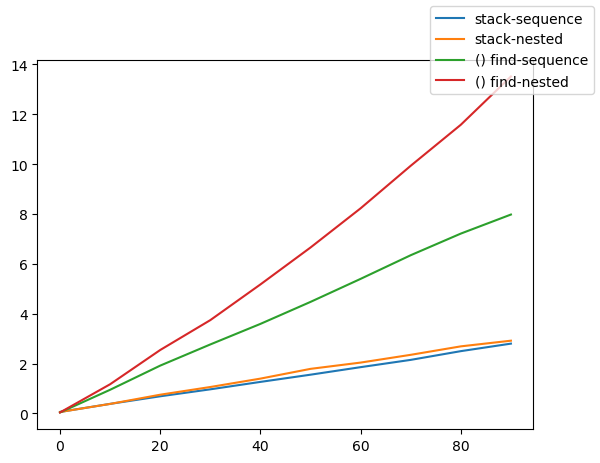

In [9]:
fig,ax = plt.subplots()

for aname, fn in approaches.items():
    print(aname)
    for iname, input_seq in inputs.items():
        print(f"  {iname}")
        results = []
        for input in input_seq:
            print(f"{len(input)//2:6}... ", end = "")
            results.append(timeit(lambda: fn(input)))
            print(f" [DONE] {results[-1]} s")
        ax.plot( sizes, results, label = aname + "-" + iname)

fig.legend()

fig.savefig("test_everything.png")

## Investigate couple finder a bit more

Prepare the inputs:

In [11]:
sizes = [ y * 10**x for x in range(3) for y in range(1,10) ]
inputs = [ "(" * size + ")" * size for size in sizes ]

Run the tests an plot the results:

   1...  [DONE] 0.1177521119825542 s
   2...  [DONE] 0.2339314809651114 s
   3...  [DONE] 0.3530287260073237 s
   4...  [DONE] 0.48519201000453904 s
   5...  [DONE] 0.5819481370272115 s
   6...  [DONE] 0.6909898160374723 s
   7...  [DONE] 0.7993463189923204 s
   8...  [DONE] 0.933801299019251 s
   9...  [DONE] 1.085753541032318 s
  10...  [DONE] 1.1791656500427052 s
  20...  [DONE] 2.44784888101276 s
  30...  [DONE] 3.830348661984317 s
  40...  [DONE] 5.213293117994908 s
  50...  [DONE] 6.840261881996412 s
  60...  [DONE] 8.218795259017497 s
  70...  [DONE] 9.655028940993361 s
  80...  [DONE] 11.438569354009815 s
  90...  [DONE] 13.17000433296198 s
 100...  [DONE] 15.445053959963843 s
 200...  [DONE] 37.37948239297839 s
 300...  [DONE] 67.02239175699651 s
 400...  [DONE] 102.15982721903129 s
 500...  [DONE] 146.01168327999767 s
 600...  [DONE] 199.16674523998518 s
 700...  [DONE] 257.8515456089517 s
 800...  [DONE] 322.98934593901504 s
 900...  [DONE] 399.3149180079927 s


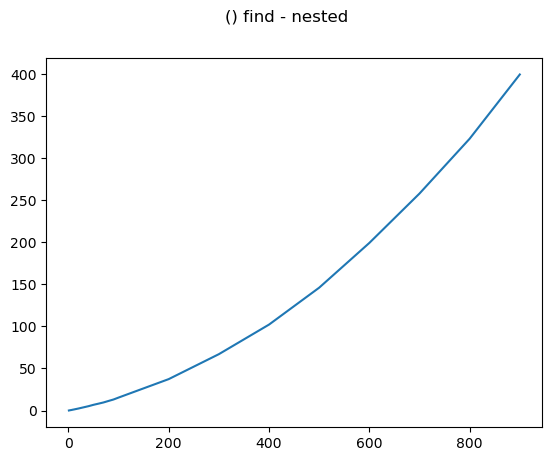

In [12]:
fig,ax = plt.subplots()

results = []

for input in inputs:
    print(f"{len(input)//2:4}... ", end = "")
    results.append(timeit(lambda: couple_finder(input)))
    print(f" [DONE] {results[-1]} s")

ax.plot(sizes, results)
fig.suptitle("() find - nested")
fig.savefig("test_couple_finder.png")